In [1]:
!pip install xgboost

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics

In [3]:
df = pd.read_csv('co2.csv')

In [4]:
df.head().style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

,YYYYMM,Value
0,197301,72.076000
1,197302,64.442000
2,197303,64.084000
3,197304,60.842000
4,197305,61.798000


In [5]:
df.shape

(523, 2)

In [6]:
df[df.duplicated(subset='YYYYMM')]

,YYYYMM,Value


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YYYYMM  523 non-null    int64  
 1   Value   523 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.3 KB


In [8]:
df.describe()

,YYYYMM,Value
count,523.000000,523.000000
mean,199435.912046,125.778954
std,1259.444618,31.903910
min,197301.000000,60.544000
25%,198311.500000,102.015000
50%,199410.000000,129.054000
75%,200508.500000,151.502500
max,201607.000000,188.407000


* We use Pandas to import the CSV file. We notice that the dataframe contains a column 'YYYYMM' that needs to be separated into 'Year' and 'Month' column. In this step, we will also remove any null values that we may have in the dataframe. Finally, we will retrieve the last five elements of the dataframe to check if our code worked. And it did!

In [9]:
df['Month'] = df.YYYYMM.astype(str).str[4:6].astype(int)
df['Year'] = df.YYYYMM.astype(str).str[0:4].astype(int)

In [10]:
df.head()

,YYYYMM,Value,Month,Year
0,197301,72.076,1,1973
1,197302,64.442,2,1973
2,197303,64.084,3,1973
3,197304,60.842,4,1973
4,197305,61.798,5,1973


In [11]:
df.shape

(523, 4)

In [12]:
df.drop(['YYYYMM'], axis=1, inplace=True)

In [14]:
df.head().style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

,Value,Month,Year
0,72.076000,1,1973
1,64.442000,2,1973
2,64.084000,3,1973
3,60.842000,4,1973
4,61.798000,5,1973


In [15]:
df.dtypes

Value    float64
Month      int32
Year       int32
dtype: object

In [16]:
df.isnull().sum()

Value    0
Month    0
Year     0
dtype: int64

In [17]:
df.shape

(523, 3)

In [18]:
X = df.drop(columns=['Value']).values
y = df['Value'].values

In [19]:
X

array([[   1, 1973],
       [   2, 1973],
       [   3, 1973],
       ...,
       [   5, 2016],
       [   6, 2016],
       [   7, 2016]])

In [20]:
y

array([ 72.076,  64.442,  64.084,  60.842,  61.798,  66.538,  72.626,
        75.181,  68.397,  67.668,  67.021,  71.118,  70.55 ,  62.929,
        64.519,  60.544,  64.687,  64.736,  73.698,  72.559,  63.221,
        65.418,  65.593,  71.677,  72.708,  65.117,  66.532,  61.975,
        62.031,  67.875,  74.184,  77.029,  66.156,  66.651,  67.625,
        75.857,  81.264,  71.058,  73.361,  68.703,  68.985,  73.936,
        80.968,  81.962,  72.95 ,  74.746,  78.924,  84.49 ,  87.215,
        75.943,  75.092,  68.641,  74.916,  80.942,  90.667,  89.046,
        80.975,  77.369,  78.058,  83.279,  85.191,  71.476,  67.829,
        69.051,  74.201,  81.372,  88.003,  91.836,  85.066,  79.494,
        79.291,  87.107,  93.946,  83.91 ,  83.689,  78.077,  83.19 ,
        88.15 ,  96.579,  97.246,  84.463,  86.071,  86.09 ,  94.293,
       100.568,  94.862,  93.21 ,  81.245,  82.785,  91.484, 107.126,
       106.245,  95.662,  90.03 ,  91.239, 102.138, 108.164,  94.766,
        95.724,  86.

In [21]:
data_dmatrix = xgb.DMatrix(X,label=y)
data_dmatrix

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [23]:
X_train.shape, X_test.shape

((418, 2), (105, 2))

In [24]:
y_train.shape, y_test.shape

((418,), (105,))

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
reg_mod = xgb.XGBRegressor(n_estimators=1000,learning_rate=0.08,subsample=0.75,colsample_bytree=1, max_depth=7,gamma=0)

In [27]:
scores = cross_val_score(reg_mod, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.97


In [28]:
reg_mod.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [29]:
y_pred_test = reg_mod.predict(X_test)
y_pred_train = reg_mod.predict(X_train)

In [30]:
print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('R^2:', metrics.r2_score(y_test, y_pred_test))

R^2: 0.9999999097462426
R^2: 0.9783388381008071


In [31]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

MAE: 0.007675412848805409
MAE: 3.5418548514229906


In [32]:
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))

MSE: 9.348672647706125e-05
MSE: 20.018482778405694


In [33]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

RMSE: 0.009668853421014369
RMSE: 4.474201915247645


In [34]:
y_test

array([159.36 , 160.056, 138.083, 122.28 , 131.945, 117.773, 157.548,
       147.39 , 146.249, 115.772, 128.056, 142.095,  68.641, 163.114,
       161.942, 138.913,  78.077, 107.179, 162.245, 156.001, 131.695,
       108.607, 107.126, 134.789, 118.556, 147.318,  80.975, 148.784,
       111.194, 117.417, 138.322, 159.772, 166.165, 124.309, 126.887,
       147.523,  68.985, 127.928, 108.149, 139.482,  86.575, 138.353,
        87.107, 126.201, 160.475, 110.959, 105.084, 135.014, 160.939,
        75.092, 138.081, 177.391, 174.745, 179.476, 125.724,  75.181,
       144.891, 137.055, 138.457, 136.236, 180.673, 108.331, 105.056,
       109.086, 152.302, 179.42 , 140.283, 157.377, 120.445,  86.587,
        67.625, 108.583, 132.871, 124.074, 184.807, 141.139,  62.031,
        81.962, 120.469, 162.998, 179.993, 175.518, 136.577, 126.652,
        75.943, 119.436,  88.646, 123.65 , 170.779, 137.474, 113.584,
       147.23 ,  80.942, 139.614, 174.92 , 118.823, 119.943, 100.568,
       138.155,  95.

In [35]:
y_pred_test

array([158.78001 , 161.91385 , 140.96031 , 117.888374, 129.86215 ,
       118.706726, 150.74023 , 147.1517  , 141.58609 , 120.38886 ,
       129.71765 , 143.73254 ,  70.8386  , 158.91216 , 162.83224 ,
       142.99973 ,  78.99813 , 110.828896, 152.86679 , 155.69891 ,
       136.33472 , 108.338295, 105.90665 , 126.080215, 120.52467 ,
       140.12263 ,  79.9686  , 147.44522 , 114.40619 , 105.676926,
       137.2086  , 154.94485 , 174.34976 , 117.62489 , 123.80151 ,
       149.22385 ,  71.09461 , 120.51818 , 103.06638 , 144.64526 ,
        88.277275, 136.43245 ,  84.61055 , 125.15144 , 167.35144 ,
       106.72964 , 117.57828 , 130.51884 , 163.98296 ,  71.948364,
       144.3029  , 180.79617 , 174.87894 , 175.52295 , 115.48788 ,
        73.65736 , 145.622   , 141.50986 , 140.44441 , 139.33318 ,
       173.837   , 107.11383 , 101.16542 , 105.24379 , 150.25534 ,
       173.39314 , 138.99118 , 161.3044  , 129.09093 ,  88.10381 ,
        69.57427 , 106.41087 , 136.70041 , 127.477295, 182.732

<Axes: xlabel='Year', ylabel='Value'>

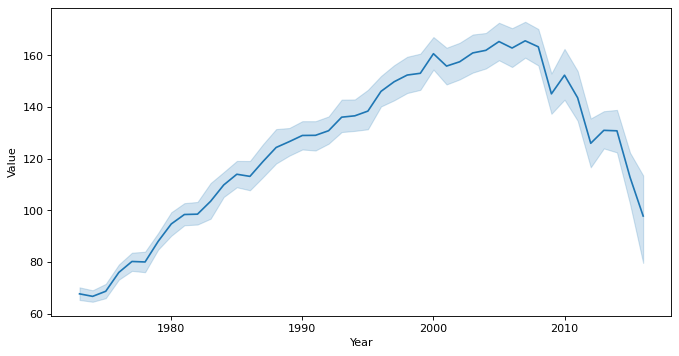

In [36]:
plt.figure(figsize=(10, 5), dpi=80)
sns.lineplot(x='Year', y='Value', data=df)

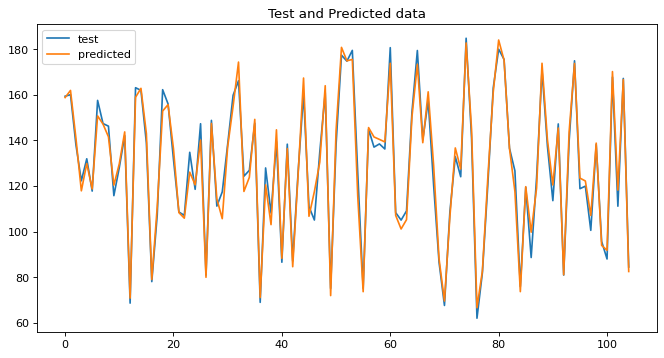

In [37]:
plt.figure(figsize=(10, 5), dpi=80)
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="test")
plt.plot(x_ax, y_pred_test, label="predicted")
plt.title("Test and Predicted data")
plt.legend()
plt.show()

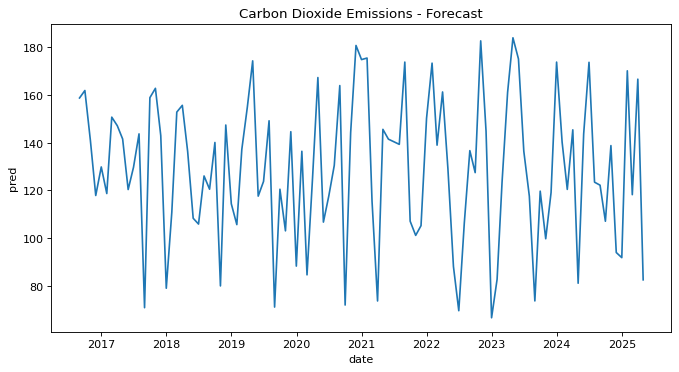

In [38]:
plt.figure(figsize=(10, 5), dpi=80)
df=pd.DataFrame(y_pred_test, columns=['pred']) 
df['date'] = pd.date_range(start='8/1/2016', periods=len(df), freq='M')
sns.lineplot(x='date', y='pred', data=df)
plt.title("Carbon Dioxide Emissions - Forecast")
plt.show()